#The numbers' MVP
##Data Engineering Project
Lluc Furriols - NIU: 1673587,
Hector Marchiori - NIU: 1673121,
Pol Puig - NIU: 1669546

The 2022-2023 nba regular season has finally come to an end, and with that, the organization has already announced the winners of the regular season awards.

In this project we will focus on the Michael Jordan award, current name for the MVP award, which stands for Most Valuable Player. It has been really controversial this year since Joel Embiid, center for the Philadelphia 76ers, was awarded with it. Nikola Jokic, center for the Denver Nuggets, was the heavy favourite to win the award throughout the year, and others argue the Greek Giannis Antetokounmpo deserved to be granted the prize.

In this project, by using only data, we will determine if Joel Embiid was worthy of the Michael Jordan Award.
The data was obtained from https://www.basketball-reference.com/, a website fully commited to compiling data from the NBA, so it's 100% accurate.


In [1]:
import numpy as np #Esto importa la biblioteca NumPy bajo el alias "np".

import pandas as pd #Esto importa la biblioteca Pandas bajo el alias "pd".
#Pandas es ampliamente utilizado para la manipulación y análisis de datos en Python, especialmente para trabajar con datos tabulares.

import matplotlib.pyplot as plt #Esto importa la biblioteca Matplotlib bajo el alias "plt".
#Matplotlib es una biblioteca gráfica ampliamente utilizada en Python para crear gráficos y visualizaciones.

from mpl_toolkits.mplot3d import Axes3D #Esto importa la clase "Axes3D" del módulo "mpl_toolkits.mplot3d".
#Esta clase se utiliza para crear gráficos tridimensionales en Matplotlib.

In [ ]:
#Read the files
statspergame = pd.read_csv("/content/Rk.csv")
statsadvanced = pd.read_csv("/content/2022-23NBAstatsadvanced.csv")
teams = pd.read_csv("/content/2022-23teams.csv")
allmvps = pd.read_csv("/content/allNBAmvps.csv")

#Set indexes
statspergame = statspergame.set_index("Player-additional")
statsadvanced = statsadvanced.set_index("Player-additional")
#Esto significa que se está utilizando la columna "Player-additional" como índice para los DataFrames statspergame y statsadvanced

allmvps = allmvps.set_index("Season")
#Y la columna "Season" se usa como índice para el DataFrame allmvps.

#statsadvanced tiene 2 columnas vacías para separar, las vamos a eliminar
statsadvanced = statsadvanced.dropna(axis=1)

NameError: ignored

Once we've imported the .csv files, we can start working. As we can easily see, we have 539 rows, which means the 539 players have played at least one game in the NBA this season. The choice must be narrowed down to a player, so we'll begin filtering this table until we've cut down the choice to the main candidates for the award.

In [ ]:
#Count the players
playerscount = len(statspergame.index)
#Cuenta cuántas filas hay en ese DataFrame. Cada fila representa un jugador diferente.

print("Players Count =",playerscount)

NameError: ignored

An NBA season is 82 games long. The MVP must be: someone who has played a considerable amount of games (if you have been injured for over half of the season you shouldn't be considered the MVP of the season).

Another condition that has to be met is that the player must be a starter, or has to have played a substantial amount of minutes.

In [ ]:
#Siendo generosos con los jugadores fijaremos el mínimo en la mitad de los 82 partidos de la temporada.
#Además, debieron haber promediado más minutos por partido que el promedio de la liga

# Calcula el promedio de juegos por equipo (82 juegos divididos por 2 equipos)
mingamesplayed = (82 / 2)

# Calcula el promedio de minutos jugados por jugador
minminutesplayed = statspergame["MP"].mean()

# Imprime un mensaje que muestra el tiempo promedio de juego en la liga
print("League average play time:",minminutesplayed)

# Crea una condición de filtro que selecciona jugadores que han jugado más juegos que mingamesplayed
# y más minutos que minminutesplayed
filtercondition = (statspergame["G"] > mingamesplayed) & (statspergame["MP"] > minminutesplayed)

# Filtra el DataFrame statspergame utilizando la condición anterior y crea un nuevo DataFrame statspergamef
statspergamef = statspergame[filtercondition]


#Para comprobar que el filtro ha funcionado correctamente:
#Comprobamos la cantidad de jugadores actualmente en la lista.
playerscount = len(statspergamef.index)
print("Players Count =",playerscount)

#Comprobamos que los jugadores que no cumplen la condición no están en la mesa.
#Zion Williamson -> Superestrella que se ha perdido la mayoría de los partidos por lesión -> Tag=willizi01
print("Zion Williamson, games played:", statspergame.loc["willizi01", "G"], "- Is in filtered version?", "willizi01" in statspergamef.index)

#Bones Hyland -> Jugador de rol sólido que juega menos que el promedio de la liga -> Etiqueta = hylanbo01
print("Bones Hyland, minutes played per game:", statspergame.loc["hylanbo01", "MP"], "- Is in filtered version?", "hylanbo01" in statspergamef.index)
print("\n")

statspergamef

League average play time: 19.79591836734694
Players Count = 227
Zion Williamson, games played: 29 - Is in filtered version? False
Bones Hyland, minutes played per game: 19.4 - Is in filtered version? False




,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player-additional,,,,,,,,,,,,,,,,,,,,,
achiupr01,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
adamsst01,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
adebaba01,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
agbajoc01,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
aldamsa01,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
willipa01,523,Patrick Williams,PF,21,CHI,82,65,28.3,3.8,8.3,...,0.857,1.0,3.0,4.0,1.2,0.9,0.9,1.2,1.8,10.2
woodch01,531,Christian Wood,C,27,DAL,67,17,25.9,5.9,11.5,...,0.772,1.3,6.0,7.3,1.8,0.4,1.1,1.8,2.5,16.6
wrighde01,532,Delon Wright,PG,30,WAS,50,14,24.4,2.8,5.8,...,0.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4


Great, we've now successfully removed over half of the league, however, there's still lots of bad players. To do the next filter we'll focus on the most important stat in basketball, points.

We'll use the file allNBAmvps.csv, which contains the stats of all MVPs that the NBA has ever had. We'll find how many points are the least you can score in order to win MVP. We'll take the lowest number as a minimum, and that's being generous since the pace of the game is much quicker now and more points are scored in every game.

In [ ]:
# Encuentra la menor cantidad de puntos anotados por un Jugador Más Valioso (MVP) en la historia
minpoints = allmvps["PTS"].min()

# Imprime un mensaje que muestra la cantidad mínima de puntos anotados por un MVP
print("Puntos mínimos anotados por un MVP:", minpoints)

# Crea una condición de filtro que selecciona jugadores que han anotado más puntos que minpoints
filtercondition = (statspergame["PTS"] > minpoints)

# Filtra el DataFrame statspergamef utilizando la condición anterior y crea un nuevo DataFrame statspergamef2
statspergamef2 = statspergamef[filtercondition]

# Calcula la cantidad de jugadores que cumplen con la condición y almacena este número en la variable playerscount
playerscount = len(statspergamef2.index)

# Imprime un mensaje que muestra la cantidad de jugadores que cumplen con la condición
print("Cantidad de jugadores =", playerscount)

# Muestra información específica sobre Quentin Grimes, como la cantidad de puntos anotados por juego y si está en la versión filtrada
print("Quentin Grimes, puntos anotados por juego:", statspergame.loc["grimequ01", "PTS"], "- ¿Está en la versión filtrada?", "grimequ01" in statspergamef2.index)

# Imprime una línea en blanco para separar la salida en la consola
print("\n")

# Muestra el DataFrame statspergamef2, que contiene las estadísticas filtradas
statspergamef2


NameError: ignored

Even though we have reduced our options to almost 100, we still have some mediocre players who are not worthy of the Michael Jordan trophy. Which is why we're entering territory of advanced statistics. Particularly, we'll be now using PER, which stands for Player Efficiency Rating.

The Player Efficiency Rating (PER) is a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." We have a file that contains advanced statistics such as PER called 2022-23NBAstatsadvanced.csv, which we're going to use for this.

In [ ]:
# En primer lugar, aplica los filtros previamente aplicados a las estadísticas normales a las estadísticas avanzadas.
# Esto significa que se seleccionarán las estadísticas avanzadas correspondientes a los mismos jugadores que pasaron el filtro en las estadísticas normales.
statsadvancedf2 = statsadvanced[(statsadvanced.index.isin(statspergamef2.index))]

# El nuevo filtro será más simple, ya que solo vamos a reducir la tabla a los 25 mejores índices de Eficiencia del Jugador (PER).
sortedstatsadvancedf2 = statsadvancedf2.sort_values(by="PER", ascending=False)
statsadvancedf3 = sortedstatsadvancedf2.head(25)

# Se ordena la tabla statsadvancedf3 por el nombre del jugador (Player-additional).
statsadvancedf3 = statsadvancedf3.sort_values(by="Player-additional")

# Muestra la tabla de estadísticas avanzadas filtrada y ordenada.
statsadvancedf3


,Rk,Player,Pos,Age,Tm,G,MP,PER,ORB%,DRB%,...,BLK%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player-additional,,,,,,,,,,,,,,,,,,,,,
antetgi01,11,Giannis Antetokounmpo,PF,28,MIL,63,2024,29.0,7.3,30.0,...,2.1,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
bookede01,49,Devin Booker,SG,26,PHO,53,1835,22.0,2.7,12.0,...,0.9,31.8,4.2,1.9,6.0,0.157,4.5,-0.3,4.2,2.9
butleji01,75,Jimmy Butler,SF,33,MIA,64,2138,27.6,7.5,13.3,...,1.0,25.6,9.4,2.9,12.3,0.277,6.7,2.0,8.7,5.8
curryst01,108,Stephen Curry,PG,34,GSW,56,1941,24.1,2.3,16.8,...,0.9,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.6,4.7
davisan02,110,Anthony Davis,C,29,LAL,56,1904,27.8,11.3,27.6,...,5.1,28.4,5.5,3.4,9.0,0.226,4.6,1.7,6.3,4.0
doncilu01,125,Luka Dončić,PG,23,DAL,66,2391,28.7,2.6,25.4,...,1.2,37.6,7.3,2.9,10.2,0.204,7.6,1.4,9.0,6.6
duranke01,137,Kevin Durant,PF-SF,34,TOT,47,1672,25.9,1.2,19.5,...,3.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
embiijo01,143,Joel Embiid,C,28,PHI,66,2284,31.4,5.9,28.3,...,4.6,37.0,8.4,3.9,12.3,0.259,6.8,2.3,9.2,6.4
foxde01,153,De'Aaron Fox,PG,25,SAC,73,2435,21.8,1.9,12.4,...,0.8,30.1,5.5,1.8,7.4,0.146,3.4,-0.9,2.5,2.7


In [ ]:
#We update the statspergame table
statspergamef3 = statspergame[(statspergame.index.isin(statsadvancedf3.index))]

statspergame[(statspergame.index.isin(statsadvancedf3.index))]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player-additional,,,,,,,,,,,,,,,,,,,,,
antetgi01,11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
bookede01,49,Devin Booker,SG,26,PHO,53,53,34.6,9.9,20.1,...,0.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8
butleji01,75,Jimmy Butler,SF,33,MIA,64,64,33.4,7.5,13.9,...,0.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9
curryst01,108,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
davisan02,110,Anthony Davis,C,29,LAL,56,54,34.0,9.7,17.2,...,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9
doncilu01,125,Luka Dončić,PG,23,DAL,66,66,36.2,10.9,22.0,...,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4
duranke01,137,Kevin Durant,PF-SF,34,TOT,47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
embiijo01,143,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
foxde01,153,De'Aaron Fox,PG,25,SAC,73,73,33.4,9.3,18.2,...,0.780,0.5,3.6,4.2,6.1,1.1,0.3,2.5,2.4,25.0


###THE MVP AWARD
There's always been a lot of controversy regarding this trophy, and that is, appart from other reasons, because the NBA has never given a precise deffinition of what it stands for. We know the meaning is Most Valuable Player, however, the voters throughout the history have voted following one of this 4 definitions:
1. The best player: lots of people vote who they believe is the best player in the organisation, however, this would mean Michael Jordan should have like 10 MVPs.
2. The most outstanding player: some MVP have been awarded to players who've achieved incredible statistical feats never seen before. Like Russell Westbrook's triple double season.
3. Best player on best team: other people just vote the greatest players of the better performing teams.
4. Most valuable to his team: which reward great players surrounded by bad teammates.
We'll try to come up with a formula that takes into account all 4.

In [ ]:
#We need to make a formula according to the previous definition:

#1. Best player: PER (Best 1 point, worst 0)
#There's an issue, PER rewards players that have played really good garbage minutes. If we check the PER column, we'll see the highest PER is by someone who's played 2 minutes.
#To make the standarization onto the whole league I will remove the players that played garbage time (we'll set the bar at 100 minutes) -> statsadvancedng(no garbage)
garbtime = 100
statsadvancedng = statsadvanced[statsadvanced["MP"] > garbtime]

#We'll create a data frame to keep track of the values of this definitions
mvppoints = pd.DataFrame(index = statsadvancedng.index)
mvppoints["Player"] = statsadvancedng["Player"]

playerscount = len(statsadvancedng.index)
print("Players Count (no garbage time) =",playerscount)

min_value = statsadvancedng["PER"].min()
max_value = statsadvancedng["PER"].max()

value_range = max_value - min_value

mvppoints["1"] = (statsadvancedng["PER"] - min_value) / value_range #PER normalized


#2. Outstanding player/Narrative (OP):
# Only stats also in allNBAmvps -> this feats describe unbelievable and rare seasons
# +0,1 if -> (60%fg, 50%fg-40%3pt-90%ft (0,2), 30pt, 12rb, 9ast, 10pt-10ast-10reb (0,15), 45pt+ast+reb+blk+stl (0,15), 3blk+stl)
#Remove garbage time players
statspergameng = statspergame[(statspergame.index.isin(statsadvancedng.index))]

OP = []

# Iterate through the DataFrame rows using iterrows()
for index, row in statspergameng.iterrows():
    value = 0
    #Add the conditions
    if (row["FG%"] >= 0.6): value += 0.1
    if ((row["FG%"] >= 0.5) and (row["3P%"] >= 0.4) and (row["FT%"] >= 0.9)): value += 0.2
    if (row["PTS"] >= 30): value += 0.1
    if (row["TRB"] >= 12): value += 0.1
    if (row["AST"] >= 9): value += 0.1
    if ((row["PTS"] >= 10) and (row["TRB"] >= 10) and (row["AST"] >= 10)): value += 0.15
    if ((row["PTS"] + row["AST"] + row["TRB"] + row["STL"] + row["BLK"]) >= 45): value += 0.15
    if ((row["BLK"] + row["STL"]) >= 3): value += 0.1



    #Append the new value to the list
    OP.append(value)

#Add the new column to the DataFrame
mvppoints["2"] = OP

#3. Best player on best team
#Value is just team win percentage (best = 1, worst = 0), so we're just checking that he's on a winning team
#If TOT (has changed teams during season), set it to mean for non-tanking teams (+.300 teams)
#We find the mean for non tanking teams
notankteams = teams[teams["W/L%"] > 0.3]
mean = notankteams["W/L%"].mean()
Wper = []

for index, row in statspergameng.iterrows():
    value = 0
    if row["Tm"] == "TOT":
        value = mean
    else:
        team_win_percentage = teams.loc[teams["TAG"] == row["Tm"], "W/L%"].item()
        value = team_win_percentage
    Wper.append(value)

mvppoints["3"] = Wper


#4. Most valuable to his team
# Set BPM range from 1 (best) to 0 (worst) * 0,35 + set VORP from 1(best) to 0 (worst) * 0,15 + set WS/48 from 1 (best) to 0 (worst) * 0,5
min_value_bpm = statsadvancedng["BPM"].min()
max_value_bpm = statsadvancedng["BPM"].max()

value_range_bpm = max_value_bpm - min_value_bpm

mvppoints["BPMn"] = (statsadvancedng["BPM"] - min_value_bpm) / value_range_bpm

min_value_vorp = statsadvancedng["VORP"].min()
max_value_vorp = statsadvancedng["VORP"].max()

value_range_vorp = max_value_vorp - min_value_vorp

mvppoints["VORPn"] = (statsadvancedng["VORP"] - min_value_vorp) / value_range_vorp

min_value_ws48 = statsadvancedng["WS/48"].min()
max_value_ws48 = statsadvancedng["WS/48"].max()

value_range_ws48 = max_value_ws48 - min_value_ws48

mvppoints["WS/48n"] = (statsadvancedng["WS/48"] - min_value_ws48) / value_range_ws48

mvppoints["4"] = ((mvppoints["BPMn"] * 0.35) + (mvppoints["VORPn"] * 0.15) + (mvppoints["WS/48n"] * 0.5))

#Now that we have the 4th definition column we can remove the columns we used
mvppoints = mvppoints.drop(columns="BPMn")
mvppoints = mvppoints.drop(columns="VORPn")
mvppoints = mvppoints.drop(columns="WS/48n")

print("\n")

mvppoints

NameError: ignored

In [ ]:
#Now we're going to check who the MVP is in each of this 4 definitions
#To do so we're getting back to the 25 main candidates

mvppointsf3 = mvppoints[(mvppoints.index.isin(statsadvancedf3.index))]

print("The MVP according to the first definition (best player):",mvppointsf3.loc[mvppointsf3["1"].idxmax(), "Player"])
print("The MVP according to the second definition (most outstanding):",mvppointsf3.loc[mvppointsf3["2"].idxmax(), "Player"])
print("The MVP according to the third definition (best player in best team):",mvppointsf3.loc[mvppointsf3["3"].idxmax(), "Player"])
print("The MVP according to the fourth definition (most valuable to his team):",mvppointsf3.loc[mvppointsf3["4"].idxmax(), "Player"])

The MVP according to the first definition (best player): Nikola Jokić
The MVP according to the second definition (most outstanding): Nikola Jokić
The MVP according to the third definition (best player in best team): Giannis Antetokounmpo
The MVP according to the fourth definition (most valuable to his team): Nikola Jokić


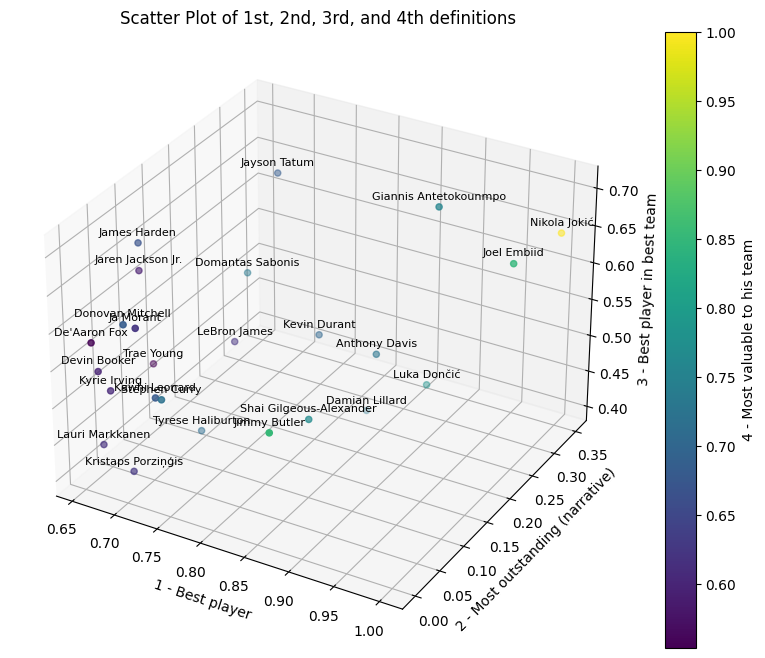

In [ ]:
#Now we're going to plot this top 25 players in a "4d" scatter plot
# Extract the data for the four columns
x = mvppointsf3["1"]
y = mvppointsf3["2"]
z = mvppointsf3["3"]
c = mvppointsf3["4"]

# Create the scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Set labels and title
ax.set_xlabel("1 - Best player")
ax.set_ylabel("2 - Most outstanding (narrative)")
ax.set_zlabel("3 - Best player in best team")
plt.title("Scatter Plot of 1st, 2nd, 3rd, and 4th definitions")

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label("4 - Most valuable to his team")

# Add names or labels to the data points
for i, tag in enumerate(statsadvancedf3["Player"]):
    ax.text(x[i], y[i], z[i]+0.01, tag, fontsize=8, ha='center')

# Show the plot
plt.show()

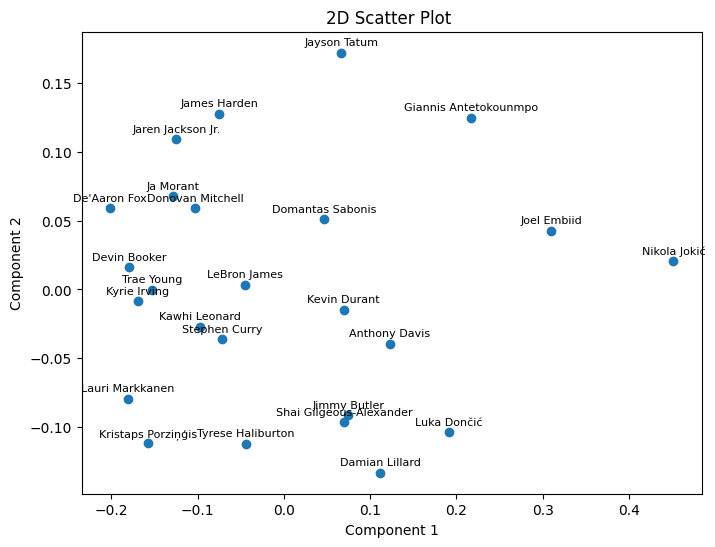

In [ ]:
#Now we'll reduce dimensionality to improve readability

from sklearn.decomposition import PCA

data = mvppointsf3[["1", "2", "3", "4"]]

# Perform PCA with 2 components
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Extract the components
x = data_2d[:, 0]
y = data_2d[:, 1]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)

# Add names
for i, tag in enumerate(statsadvancedf3["Player"]):
    plt.text(x[i], y[i]+0.005, tag, fontsize=8, ha='center')

# Set labels and title
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("2D Scatter Plot ")

# Show the plot
plt.show()

In [ ]:
#Now compute the Total MVP
mvppoints["Total"] = mvppoints["1"] + mvppoints["2"] + mvppoints["3"] + mvppoints["4"]
mvppointsf3 = mvppoints[(mvppoints.index.isin(statsadvancedf3.index))]

print("The deserving MVP:",mvppointsf3.loc[mvppointsf3["Total"].idxmax(), "Player"]+", with",str(mvppointsf3.loc[mvppointsf3["Total"].idxmax(), "Total"])+"/4 points")

print("\n")

print("The whole ladder:")
mvppointsf3sorted = mvppointsf3.sort_values(by="Total", ascending = False)
print(print(mvppointsf3sorted.to_string(index = False)))

#With this we can visualize the whole dataframe
mvppointssorted = mvppoints.sort_values(by="Total", ascending = False)

print("\n")

mvppointssorted

The deserving MVP: Nikola Jokić, with 2.996/4 points


The whole ladder:
                 Player        1    2     3        4    Total
           Nikola Jokić 1.000000 0.35 0.646 1.000000 2.996000
            Joel Embiid 0.996528 0.25 0.659 0.847450 2.752978
  Giannis Antetokounmpo 0.913194 0.25 0.707 0.756592 2.626786
            Luka Dončić 0.902778 0.25 0.463 0.782157 2.397935
           Jayson Tatum 0.729167 0.25 0.695 0.683164 2.357331
          Anthony Davis 0.871528 0.20 0.524 0.727795 2.323323
           Jimmy Butler 0.864583 0.00 0.537 0.852123 2.253706
       Domantas Sabonis 0.722222 0.20 0.585 0.734920 2.242142
           Kevin Durant 0.805556 0.20 0.528 0.700785 2.234341
         Damian Lillard 0.833333 0.25 0.402 0.728670 2.214003
Shai Gilgeous-Alexander 0.850694 0.10 0.488 0.767045 2.205739
           James Harden 0.656250 0.10 0.659 0.668834 2.084084
           LeBron James 0.736111 0.15 0.524 0.620433 2.030544
       Donovan Mitchell 0.701389 0.00 0.622 0.683405 2.0067

,Player,1,2,3,4,Total
Player-additional,,,,,,
jokicni01,Nikola Jokić,1.000000,0.35,0.646,1.000000,2.996000
embiijo01,Joel Embiid,0.996528,0.25,0.659,0.847450,2.752978
antetgi01,Giannis Antetokounmpo,0.913194,0.25,0.707,0.756592,2.626786
doncilu01,Luka Dončić,0.902778,0.25,0.463,0.782157,2.397935
tatumja01,Jayson Tatum,0.729167,0.25,0.695,0.683164,2.357331
...,...,...,...,...,...,...
washity02,TyTy Washington Jr.,0.166667,0.00,0.268,0.179101,0.613768
bouknja01,James Bouknight,0.121528,0.00,0.329,0.146083,0.596610
rhodeja01,Jared Rhoden,0.131944,0.00,0.207,0.237602,0.576546


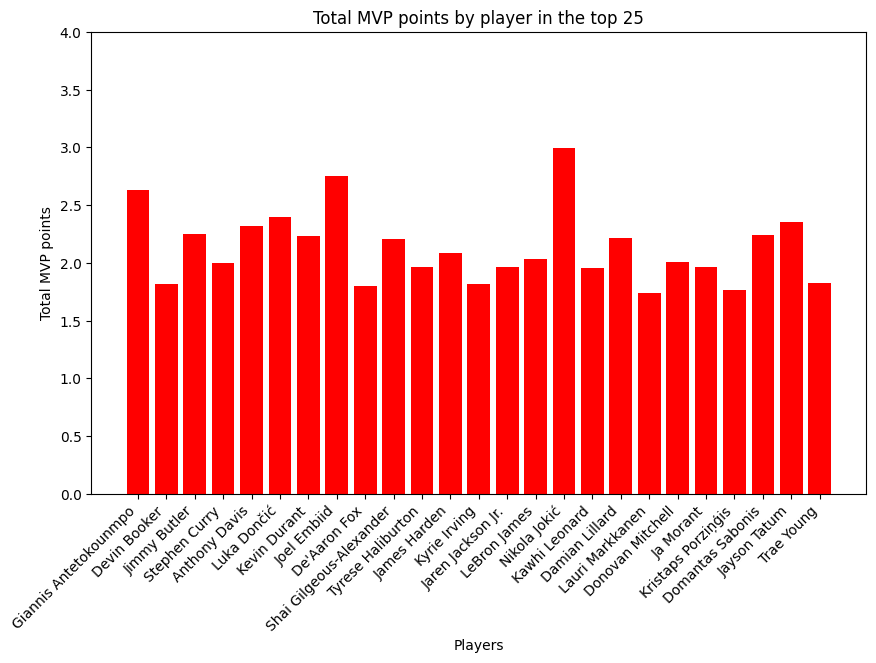

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

plt.bar(mvppointsf3["Player"],mvppointsf3["Total"], color = "red")

plt.xlabel("Players")
plt.ylabel("Total MVP points")
plt.title("Total MVP points by player in the top 25")
plt.xticks(rotation = 45, ha = "right")  # rotate x-axis tick labels
plt.ylim(bottom=0, top=4)  # Adjust the limits

plt.show()

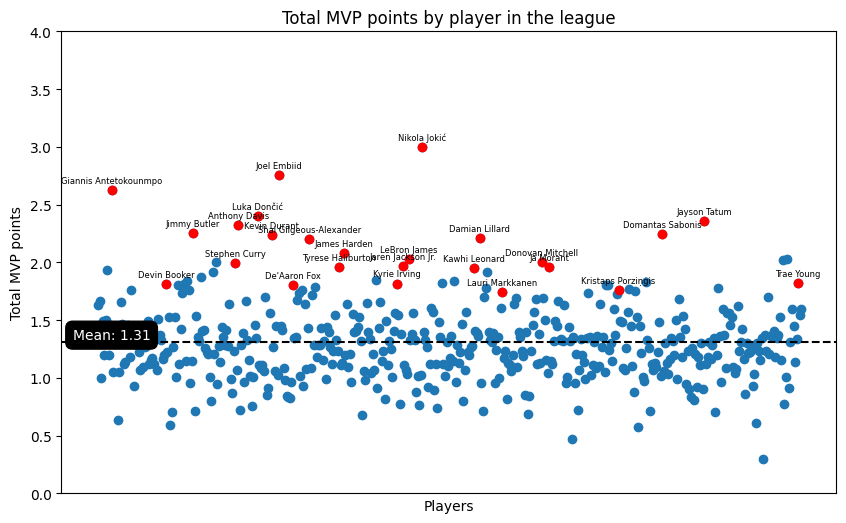

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

plt.scatter(mvppoints["Player"],mvppoints["Total"])

#Highlight top 25 players
players_to_label = np.array(mvppointsf3["Player"])

# Iterate through players and add text annotations
for index, row in mvppoints.iterrows():
    player = row["Player"]
    if player in players_to_label:
        total = row["Total"]
        plt.scatter(player, total, color='red')
        plt.annotate(player, (player, total), textcoords="offset points", xytext=(0, 5), ha='center', fontsize = 6)

plt.xlabel("Players")
plt.ylabel("Total MVP points")
plt.title("Total MVP points by player in the league")
plt.xticks([])  # Remove x-axis tick labels
plt.ylim(bottom=0, top=4)  # Adjust the limits

mean_value = mvppoints["Total"].mean()  # Calculate the mean value
plt.axhline(mean_value, color='black', linestyle='--')  # Add a horizontal line for the mean
plt.text(10, mean_value, 'Mean: {:.2f}'.format(mean_value), color='white', ha='center', va='bottom', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

At last we can see who really deserved the Michael Jordan trophy was probably Nikola Jokic.

Of course this aproximation isn't 100% accurate and we might be overlooking some things. One thing that we cannot get in numbers is the leadership of a player, and limiting defense to stats like steals or blocks doesn't paint the whole picture. However the results we obtained make a lot of sense and are really close to the opinions of profesional critics which is an indicator of a great job.

Also, by looking at the final results we see that really giving the award to Embiid isn't a crazy thing to do. It's true that his game might depend too much on free throws and he has another superstar caliber player on his team, like it's also true that stats really make Jokic look like a better defender than he actually is.´

Another thing we see when we look at the dataframe of the whole league (without including players who barely played), are some names who didn't make it into the top 25 for several reasons, such as injuries like Zion Williamson, or not scoring enough, like Robert Williams. This is an indicator of how well they played even though they realistically didn't have a chance to be the MVPs.

###Now we'll compare the current MVP (Joel Embiid) and our calculated MVP (Jokic) to the past MVPs.
Since the data we have available from the past (allmvps.csv) isn't as detailed as the current one, we'll limit ourselves to statistics available in this csv file.

In [ ]:
#We're going to do a similar formula as the last one, however, we don't have enough statistics to use the same exact formula.

#First show the allmvps dataframe
allmvps = allmvps.sort_values(by="Season", ascending=True)
allmvps

,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Player-additional
Season,,,,,,,,,,,,,,,,,,
1955-56,NBA,Bob Pettit,(V),23,STL,72,38.8,25.7,16.2,2.6,NaN,NaN,0.429,NaN,0.736,13.8,0.236,pettibo01
1956-57,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,4.8,7.5,NaN,NaN,0.378,NaN,0.821,8.8,0.178,cousybo01
1957-58,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206,russebi01
1958-59,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246,pettibo01
1959-60,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245,chambwi01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,antetgi01
2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,antetgi01
2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,jokicni01


In [ ]:
#Now we add our calculated MVP to the list, since Embiid already is there

jokicindex = "2022-23 (*)"
jokictag = "jokicni01"
jokicstats = {"Lg":"NBA", "Player": "Nikola Jokić", "Voting":"(L)", "Age":statspergame.loc[jokictag, "Age"], "Tm":statspergame.loc[jokictag, "Tm"], "G":statspergame.loc[jokictag, "G"], "MP":statspergame.loc[jokictag, "MP"], "PTS":statspergame.loc[jokictag, "PTS"],
              "TRB":statspergame.loc[jokictag, "TRB"], "AST":statspergame.loc[jokictag, "AST"], "STL":statspergame.loc[jokictag, "STL"], "BLK":statspergame.loc[jokictag, "BLK"], "FG%":statspergame.loc[jokictag, "FG%"], "3P%":statspergame.loc[jokictag, "3P%"],
              "FT%":statspergame.loc[jokictag, "FT%"], "WS":statsadvanced.loc[jokictag, "WS"], "WS/48":statsadvanced.loc[jokictag, "WS/48"], "Player-additional":jokictag}

allmvps.loc[jokicindex] = jokicstats

#Also, we'll remove every MVP previous to the 1973-74 season (the first season that blocks and steals started to get counted)
allmvps = allmvps.dropna(subset = ["STL"])
allmvps

,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Player-additional
Season,,,,,,,,,,,,,,,,,,
1973-74,NBA,Kareem Abdul-Jabbar,(V),26,MIL,81,43.8,27.0,14.5,4.8,1.4,3.5,0.539,NaN,0.702,18.4,0.250,abdulka01
1974-75,NBA,Bob McAdoo,(V),23,BUF,82,43.2,34.5,14.1,2.2,1.1,2.1,0.512,NaN,0.805,17.8,0.242,mcadobo01
1975-76,NBA,Kareem Abdul-Jabbar,(V),28,LAL,82,41.2,27.7,16.9,5.0,1.5,4.1,0.529,NaN,0.703,17.0,0.242,abdulka01
1976-77,NBA,Kareem Abdul-Jabbar,(V),29,LAL,82,36.8,26.2,13.3,3.9,1.2,3.2,0.579,NaN,0.701,17.8,0.283,abdulka01
1977-78,NBA,Bill Walton,(V),25,POR,58,33.3,18.9,13.2,5.0,1.0,2.5,0.522,NaN,0.720,8.4,0.209,waltobi01
1978-79,NBA,Moses Malone,(V),23,HOU,82,41.3,24.8,17.6,1.8,1.0,1.5,0.540,NaN,0.739,14.1,0.200,malonmo01
1979-80,NBA,Kareem Abdul-Jabbar,(V),32,LAL,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,abdulka01
1980-81,NBA,Julius Erving,(V),30,PHI,82,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,ervinju01
1981-82,NBA,Moses Malone,(V),26,HOU,81,42.0,31.1,14.7,1.8,0.9,1.5,0.519,0.000,0.762,15.4,0.218,malonmo01


In [ ]:
# Since the stats are much more limited: (We will also avoid the 3rd deffinition since it would be a real pain in the ass finding every win %)
# Create Ladder
allmvpspoints = pd.DataFrame(index = allmvps.index)
allmvpspoints["Player"] = allmvps["Player"]
allmvpspoints["Voting"] = allmvps["Voting"]

#1: Best player -> Instead of PER we'll make a less sofisticated formula including the categories we have available.
bestplayer = []

for index, row in allmvps.iterrows():
    value = 0
    value = row["PTS"] + row["AST"] * 2 + row["TRB"] * 1.5 + row["STL"] * 5 + row["BLK"] * 5
    if pd.notna(row["3P%"]):
      value = value + row["FG%"] + row["3P%"] * 1.5 + row["FT%"] * 0.67
    else:
      value = value + row["FG%"] * 1.5 + row["FT%"]
    bestplayer.append(value)

bestplayer = np.array(bestplayer)
bestplayermin = bestplayer.min()
bestplayermax = bestplayer.max()

bestplayeradj = (bestplayer - bestplayer.min()) / (bestplayer.max() - bestplayer.min())
allmvpspoints["1"] = bestplayeradj


#2. Outstanding player/Narrative (OP):
# Only stats also in allNBAmvps -> this feats describe unbelievable and rare seasons
# +0,1 if -> (60%fg, 50%fg-40%3pt-90%ft (0,2), 30pt, 12rb, 9ast, 10pt-10ast-10reb (0,15), 45pt+ast+reb+blk+stl (0,15), 3blk+stl)
OP = []

# Iterate through the DataFrame rows using iterrows()
for index, row in allmvps.iterrows():
    value = 0
    #Add the conditions
    if (row["FG%"] >= 0.6): value += 0.1
    if ((row["FG%"] >= 0.5) and (row["3P%"] >= 0.4) and (row["FT%"] >= 0.9)): value += 0.2
    if (row["PTS"] >= 30): value += 0.1
    if (row["TRB"] >= 12): value += 0.1
    if (row["AST"] >= 9): value += 0.1
    if ((row["PTS"] >= 10) and (row["TRB"] >= 10) and (row["AST"] >= 10)): value += 0.15
    if ((row["PTS"] + row["AST"] + row["TRB"] + row["STL"] + row["BLK"]) >= 45): value += 0.15
    if ((row["BLK"] + row["STL"]) >= 3): value += 0.1
    OP.append(value)

allmvpspoints["2"] = OP


#3. Best player on best team -> We can't do any aproximation/formula

#4. Most valuable to his team
# Just WS/48 from 1 to 0
min_value_ws48 = allmvps["WS/48"].min()
max_value_ws48 = allmvps["WS/48"].max()

value_range_ws48 = max_value_ws48 - min_value_ws48

allmvpspoints["4"] = (allmvps["WS/48"] - min_value_ws48) / value_range_ws48

allmvpspoints

,Player,Voting,1,2,4
Season,,,,,
1973-74,Kareem Abdul-Jabbar,(V),0.804414,0.35,0.454545
1974-75,Bob McAdoo,(V),0.643437,0.45,0.393939
1975-76,Kareem Abdul-Jabbar,(V),1.000000,0.35,0.393939
1976-77,Kareem Abdul-Jabbar,(V),0.640964,0.35,0.704545
1977-78,Bill Walton,(V),0.406421,0.20,0.143939
1978-79,Moses Malone,(V),0.433802,0.25,0.075758
1979-80,Kareem Abdul-Jabbar,(V),0.535765,0.20,0.280303
1980-81,Julius Erving,(V),0.372452,0.10,0.310606
1981-82,Moses Malone,(V),0.456035,0.35,0.212121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


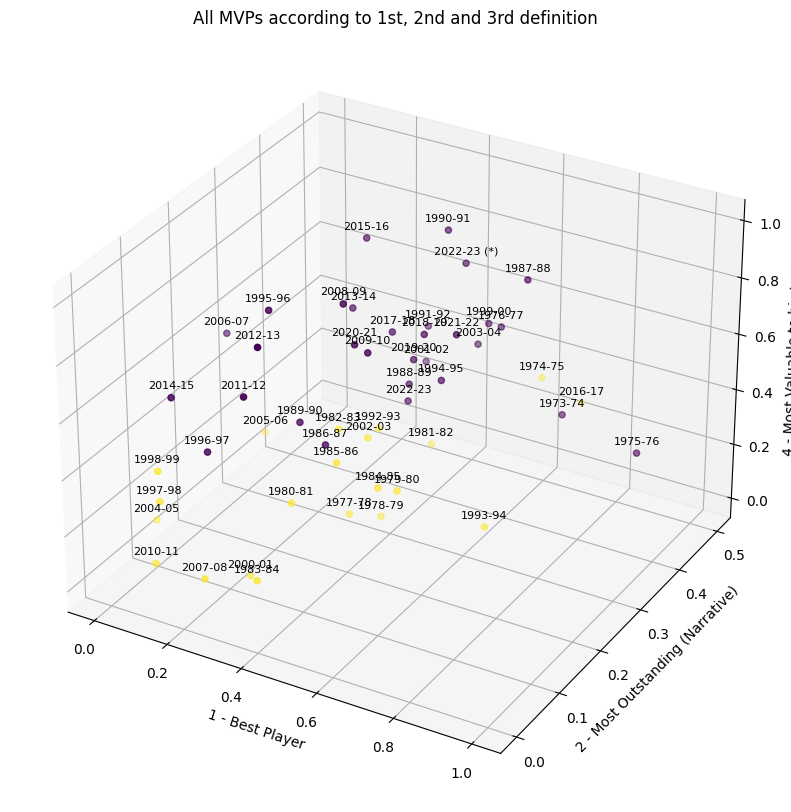

In [ ]:
#Now we're going to plot this MVPs into a 3d plot with clusters
from sklearn.cluster import KMeans
# Extract the data for the four columns
# Extract the data for the three columns
x = allmvpspoints["1"]
y = allmvpspoints["2"]
z = allmvpspoints["4"]

# Combine the three columns into a 3D array
data = np.column_stack((x, y, z))

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)  # Specify the number of clusters
kmeans.fit(data)
labels = kmeans.labels_

# Create the 3D figure and axis
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with cluster labels
ax.scatter(x, y, z, c=labels, cmap='viridis')

# Add names or labels to the data points
for i, tag in enumerate(allmvpspoints.index):
    ax.text(x[i], y[i], z[i]+0.03, tag, fontsize=8, ha='center')

# Set labels and title
ax.set_xlabel("1 - Best Player")
ax.set_ylabel("2 - Most Outstanding (Narrative)")
ax.set_zlabel("4 - Most Valuable to his team")
plt.title("All MVPs according to 1st, 2nd and 3rd definition")

# Show the plot
plt.show()

In [ ]:
#Total (max 3pts)
allmvpspoints["Total"] = allmvpspoints["1"] + allmvpspoints["2"] + allmvpspoints["4"]

#Printing
print("All MVPs sorted by points:")
allmvpspointssorted = allmvpspoints.sort_values(by="Total", ascending = False)
print(print(allmvpspointssorted.to_string(index = True)))

All MVPs sorted by points:
                            Player Voting         1     2         4     Total
Season                                                                       
1987-88             Michael Jordan    (V)  0.708508  0.35  0.893939  1.952447
1990-91             Michael Jordan    (V)  0.498985  0.35  0.992424  1.841409
2022-23 (*)           Nikola Jokić    (L)  0.546294  0.35  0.893939  1.790234
1975-76        Kareem Abdul-Jabbar    (V)  1.000000  0.35  0.393939  1.743939
1976-77        Kareem Abdul-Jabbar    (V)  0.640964  0.35  0.704545  1.695509
2021-22               Nikola Jokić    (V)  0.634075  0.25  0.803030  1.687106
1999-00           Shaquille O'Neal    (V)  0.607647  0.35  0.704545  1.662193
2015-16              Stephen Curry    (V)  0.339291  0.30  0.969697  1.608988
1973-74        Kareem Abdul-Jabbar    (V)  0.804414  0.35  0.454545  1.608959
2008-09               LeBron James    (V)  0.454794  0.15  0.969697  1.574491
2018-19      Giannis Antetokounmpo   

Now we plot to compare the data more visually


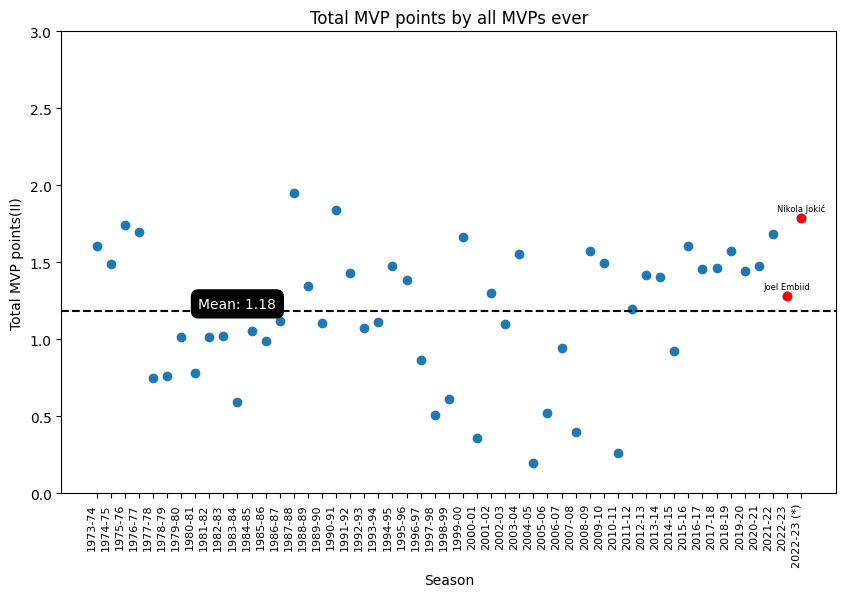

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

plt.scatter(allmvpspoints.index, allmvpspoints["Total"])

# Highlight Jokic and Embiid
players_to_label = np.array(["2022-23", "2022-23 (*)"])

# Iterate through players and add text annotations
for index, row in allmvpspoints.iterrows():
    player = row.name
    if np.isin(row.name, players_to_label):
        total = row["Total"]
        plt.scatter(player, total, color='red')
        plt.annotate(row["Player"], (player, total), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)

plt.xlabel("Season")
plt.ylabel("Total MVP points(II)")
plt.title("Total MVP points by all MVPs ever")
plt.xticks(rotation = 90, ha = "right", fontsize = 8) #Rotate
plt.ylim(bottom=0, top=3)  # Adjust the limits

mean_value = allmvpspoints["Total"].mean()  # Calculate the mean value
plt.axhline(mean_value, color='black', linestyle='--')  # Add a horizontal line for the mean
plt.text(10, mean_value, 'Mean: {:.2f}'.format(mean_value), color='white', ha='center', va='bottom', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()
